In [1]:
# Assignment Task 1
# Identifying Generative or Discriminative Models with justification

In [2]:
'''
Neural Networks:
They are Discriminative.
Neural Networks take single input and produce single output
They work on Optimizing only 1 single objective function
They don't learn the underlying distribution of the data 
'''

"\nNeural Networks:\nThey are Discriminative.\nNeural Networks take single input and produce single output\nThey work on Optimizing only 1 single objective function\nThey don't learn the underlying distribution of the data \n"

In [3]:
'''
Naive Bayes Classifier:
It is Generative.
It models the full joint distribution P(X,Y)
'''

'\nNaive Bayes Classifier:\nIt is Generative.\nIt models the full joint distribution P(X,Y)\n'

In [4]:
'''
Logistic Regression:
It is Discriminative.
It models only the conditional distribution,
P(Y | X) and not the full joint distribution P(X,Y)
'''

'\nLogistic Regression:\nIt is Discriminative.\nIt models only the conditional distribution,\nP(Y | X) and not the full joint distribution P(X,Y)\n'

In [5]:
'''
Gaussian Mixture Model:
It is Generative.
We know that an HMM is a generative Model.
Each and every unit of an HMM is a GMM,
i.e., GMM can be thought of as a single unit HMM,
so, they try to learn the distribution.
'''

'\nGaussian Mixture Model:\nIt is Generative.\nWe know that an HMM is a generative Model.\nEach and every unit of an HMM is a GMM,\ni.e., GMM can be thought of as a single unit HMM,\nso, they try to learn the distribution.\n'

In [6]:
'''
GANs:
They are Generative.
They try to learn the true distribution 
So that they can generate New and Novel Data Points by sampling
'''

'\nGANs:\nThey are Generative.\nThey try to learn the true distribution \nSo that they can generate New and Novel Data Points by sampling\n'

In [7]:
'''
LDA(Latent Dirichlet Allocation):
It is Generative. 
It is used for more than 1 task such as 
Classification and Dimensionality Reduction
This is possible only if it learns the underlying distribution
'''

'\nLDA(Latent Dirichlet Allocation):\nIt is Generative. \nIt is used for more than 1 task such as \nClassification and Dimensionality Reduction\nThis is possible only if it learns the underlying distribution\n'

In [8]:
'''
SVM:
It is Discriminative.
They try to learn the boundary for each class instead of the distribution
They try to optimize a single objective function such as loss function for classification
'''

'\nSVM:\nIt is Discriminative.\nThey try to learn the boundary for each class instead of the distribution\nThey try to optimize a single objective function such as loss function for classification\n'

In [9]:
'''
Decision Tree:
It is Discriminative.
They try to learn the boundary for each class instead of the distribution
They try to optimize a single objective function such as loss function for classification
'''

'\nDecision Tree:\nIt is Discriminative.\nThey try to learn the boundary for each class instead of the distribution\nThey try to optimize a single objective function such as loss function for classification\n'

In [10]:
'''
In General,
Generative Models have a single Input and Multiple Outputs
which can be used for other purposes such as classification
and Dimensionality Reduction, etc.
While,
Discriminative Models have a single input and single output
and work on specific problems like classification.
'''

'\nIn General,\nGenerative Models have a single Input and Multiple Outputs\nwhich can be used for other purposes such as classification\nand Dimensionality Reduction, etc.\nWhile,\nDiscriminative Models have a single input and single output\nand work on specific problems like classification.\n'

# Sequence Labeling in python

### Initialise the transition, start and emission matrix . The states stand for high and low.  The HMM model is given in the assignment itself. 

In [11]:
import numpy as np

P= np.array([[0.6, 0.4],[0.5,0.5]])

S= np.array([0.5, 0.5])

O= np.array([[0.3,0.2,0.2,0.3],[0.2,0.3,0.3,0.2]])

state={}
state[0]='L'
state[1]='H'

DNA={}
DNA['A']=0
DNA['C']=1
DNA['G']=2
DNA['T']=3


### A stupid attempt to show you why the exhaustive search is a bad, bad option for HMM modelling. 

In [12]:
from itertools import product

import time 
def exhaustive_search(sequence):
    
    M= len(sequence)
    state_len= len(S)
    
    # track the best sequence and its score
    best=(None,float('-inf'))
    
    # basically loop will run for |states|^M 
    for ss in product(range(state_len),repeat=M):
        
        score= S[ss[0]]*O[ss[0],DNA[sequence[0]]]
        
        for i in range(1,M):
            score*= P[ss[i-1],ss[i]]*O[ss[i],DNA[sequence[i]]]
            
        
        #print(','.join([state[k] for k in ss]),score)
    
        if score > best[1]:
            best= (ss,score)
    
    return best


In [13]:
sequences=['GGC','GGCAAGATCAT','GAGAGGAGAGAGAGAGAGA']

import time
for sequence in sequences:
    
    t=time.time()
    best=exhaustive_search(sequence)
    t2=time.time()-t
    
    print('For the sequence '+ sequence+ ' of length '+ str(len(sequence))+' time taken was '+ str(round(t2,3))+'s' )
    print('The sequence '+ ','.join([state[k] for k in best[0]])+ ' gave the best score of '+ str(best[1]))
    print('\n')

For the sequence GGC of length 3 time taken was 0.0s
The sequence H,H,H gave the best score of 0.003375


For the sequence GGCAAGATCAT of length 11 time taken was 0.018s
The sequence H,H,H,L,L,L,L,L,L,L,L gave the best score of 1.3774950719999997e-09


For the sequence GAGAGGAGAGAGAGAGAGA of length 19 time taken was 4.548s
The sequence H,L,L,L,H,H,L,L,L,L,L,L,L,L,L,L,L,L,L gave the best score of 1.3326697514029538e-16




In [14]:
# This is a stupid Greedy Attempt to recover the most possible sequence given the actual sequence and the HMM Model

seq='GGCAAGATCAT'
ans=[]
score=1
for i in range(len(seq)):
    if i==0:
        if S[0]*O[0][DNA[seq[i]]] > S[1]*O[1][DNA[seq[i]]]:
            score=score*S[0]*O[0][DNA[seq[i]]]
            ans.append(str(0))
        else:
            score=score*S[1]*O[1][DNA[seq[i]]]
            ans.append(str(1))
    else:
        if (P[int(ans[-1])][0]*O[0][DNA[seq[i]]])>(P[int(ans[-1])][1]*O[1][DNA[seq[i]]]):
            score=score*P[int(ans[-1])][0]*O[0][DNA[seq[i]]]
            ans.append(str(0))
        else:
            score=score*P[int(ans[-1])][1]*O[1][DNA[seq[i]]]
            ans.append(str(1))
print(ans)
print(score)

# This actually shows why using Greeedy startegy to recover the most possible sequence is wrong.

['1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0']
9.565937999999997e-10


# Dataset for this assignment: Brown corpus tagged with the Universal Tagset.

## This will be your training set. The remaining 10 sentences will be used as your test data.

In [15]:
from nltk.corpus import treebank,brown

# Using the last 10 sentences as Test Set
corpus = brown.tagged_sents(tagset='universal')[:-10] 

# Dictionaries containing frequencies for building Probability Values
tag_dict={}
word_dict={}
emi_dict={}

# Building the Tag, Word and Emission Dictionaries
for sent in corpus:
    for elem in sent:
        w = elem[0]
        tag= elem[1]

        if w not in word_dict:
            word_dict[w]=0
        
        if (tag,w) not in emi_dict:
            emi_dict[(tag,w)]=0
        
        if tag not in tag_dict:
            tag_dict[tag]=0
        
        word_dict[w]+=1
        emi_dict[(tag,w)]+=1
        tag_dict[tag]+=1

# Building the Transition and Start Dictionaries
trans_dict={}
start_dict={}
for sent in corpus:
    temp = [(None,'<s>')] + sent + [(None,'</s>')] 
    for i in range(1,len(temp)):
        
        if i==1:
            if temp[i][1] not in start_dict:
                start_dict[temp[i][1]]=0
            start_dict[temp[i][1]]+=1
            
        if (temp[i-1][1],temp[i][1]) not in trans_dict:
            trans_dict[(temp[i-1][1],temp[i][1])]=0
        
        trans_dict[(temp[i-1][1],temp[i][1])]+=1

        
# Just checking if everything is in order
print(len(word_dict))
print(len(emi_dict))
print(len(tag_dict))
print(len(start_dict))
print(len(trans_dict))

# Test Data
test_data= brown.tagged_sents(tagset='universal')[-10:]

print(len(test_data))

56043
59945
12
12
168
10


In [16]:
# Adding the start and ending tags to the tag dictionary to help with building of transition probabilities 
tag_dict['<s>']=len(corpus)
tag_dict['</s>']=len(corpus)
# Both these tags occur ince in each sentence in the corpus

In [17]:
# Building the Probabilities from the Frequencies with Additive / Laplacian Smoothing implemented for
# Emission and Transition Probabilities with k = 0.001

k=0.001
emi_prob=emi_dict.copy()

for i in emi_prob.keys():
    emi_prob[i]=(float(emi_prob[i]+k)/(tag_dict[i[0]]+k*len(emi_prob)))

trans_prob=trans_dict.copy()

for i in trans_prob.keys():
    trans_prob[i]=(float(trans_prob[i]+k)/(tag_dict[i[0]]+k*len(tag_dict)))

start_prob=start_dict.copy()

for i in start_prob.keys():
    start_prob[i]=(float(start_prob[i])/(len(corpus)))

In [18]:
# Test Sentences
test_sen = brown.tagged_sents(tagset='universal')[-10:]

In [19]:
# Seperating the words from the true Tags in the Test Set
te = []
for i in test_sen:
    temp = []
    for j in i:
        temp.append(j[0])
    te.append(temp)


In [20]:
# Implementation of the Viterbi Algorithm on the Probabilities using Dynamic Programming Matrix
# Used the HMM model(i.e. Probabilities), to find the best sequence of POS-TAGs on the test data

tag_list=list(tag_dict.keys())
tag_list.remove('<s>')
tag_list.remove('</s>')
# To store the tags got for the test data from the HMM Model
ans=[]
for i in te:
    rows = len(tag_list)
    cols = len(i)
    dp = [[None] * cols for i in range(rows)]
    # Storing a tuple in each cell (index of the previous cell, probability of the current cell)
    for col_index, curr_word in enumerate(i):
        for row_index, curr_tag in enumerate(tag_list):
            # Computing the probabilities for the first column
            if col_index == 0:
                init_prob = start_prob[curr_tag]
                try:
                    dp[row_index][col_index] = (-1, emi_prob[(curr_tag,curr_word)] * init_prob )
                except KeyError:
                    dp[row_index][col_index] = (-1, (float(k)/(tag_dict[curr_tag]+k*len(emi_prob))) * init_prob )
            # Computing the probabilities of the other columns
            else:
                best_prob_tuple = (-1, 0)
                for prev_row_index, prev_tag in enumerate(tag_list):
                    prev_prob = dp[prev_row_index][col_index - 1][1]
                    f1=0
                    try:
                        t=emi_prob[(curr_tag,curr_word)]
                    except KeyError:
                        f1=1
                    f2=0
                    try:
                        t=trans_prob[(prev_tag,curr_tag)]
                    except KeyError:
                        f2=1
                    if f1==0 and f2==0:
                        curr_prob = prev_prob * emi_prob[(curr_tag,curr_word)] * trans_prob[(prev_tag,curr_tag)]
                    if f1==1 and f2==0:
                        curr_prob = prev_prob * (float(k)/(tag_dict[curr_tag]+k*len(emi_prob))) * trans_prob[(prev_tag,curr_tag)]
                    if f1==1 and f2==1:
                        curr_prob = prev_prob * (float(k)/(tag_dict[curr_tag]+k*len(emi_prob))) * (float(k)/(tag_dict[prev_tag]+k*len(tag_dict)))
                    if f1==0 and f2==1:
                        curr_prob = prev_prob * emi_prob[(curr_tag,curr_word)] * (float(k)/(tag_dict[prev_tag]+k*len(tag_dict)))
                    if curr_prob > best_prob_tuple[1]:
                        best_prob_tuple = (prev_row_index, curr_prob)
                dp[row_index][col_index] = best_prob_tuple
    # Backtracking to fetch the best path
    # Finding the cell with the max probability from the last column
    (max_index, max_prob) = (-1, 0)
    for row in range(rows):
        curr_prob = dp[row][cols - 1][1]
        if curr_prob > max_prob:
            (max_index, max_prob) = (row, curr_prob)
    output_tag_list = list()  # List to store the output tags
    # Adding the best path to output list
    for col in range(cols - 1, 0, -1):
        output_tag_list.insert(0, tag_list[max_index])
        max_index = dp[max_index][col][0]
    output_tag_list.insert(0, tag_list[max_index])
    ans.append(output_tag_list)


In [21]:
# Accuracy of the HMM Model with the Viterbi Algorithm

labels=['DET',
 'NOUN',
 'ADJ',
 'VERB',
 'ADP',
 '.',
 'ADV',
 'CONJ',
 'PRT',
 'PRON',
 'NUM',
 'X']

sorted_labels = sorted(
    labels, 
    key=lambda name: (name[1:], name[0]))

# The True Labels for the Test Set Data
a=[]
for i in test_data:
    t=[]
    for j in i:
        t.append(j[1])
    a.append(t)

In [22]:
# To check Accuracy
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

# Accuracy as the percentage of the correct tags
metrics.flat_f1_score(a, ans, average='weighted', labels=labels)

/home/bhargav/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bhargav/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.9386653882119602

In [23]:
# Confusion Matrix for the Model
print(metrics.flat_classification_report(
    a, ans, labels=sorted_labels, digits=3))

             precision    recall  f1-score   support

          .      0.943     1.000     0.971        33
          X      0.250     0.667     0.364         3
        ADJ      0.938     0.833     0.882        18
        ADP      1.000     0.963     0.981        27
        ADV      0.800     0.889     0.842         9
       VERB      0.941     0.914     0.928        35
        DET      1.000     1.000     1.000        33
       CONJ      0.875     1.000     0.933         7
       NOUN      0.978     0.863     0.917        51
       PRON      1.000     1.000     1.000        12
        PRT      0.917     1.000     0.957        11
        NUM      0.000     0.000     0.000         0

avg / total      0.950     0.933     0.939       239



/home/bhargav/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bhargav/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Module to implement CRF. 

In [24]:
# pip3 install sklearn-crfsuite # install this please

train_sents= corpus

# Function to return the Previous word
def pword(i,sent):
    if i == 0:
        return ''
    else:
        return sent[i-1][0]

    
# Fucntion to return the Next word
def nword(i,lsent,sent):
    if i==lsent - 1:
        return ''
    else:
        return sent[i+1][0]

# Function to return the Previous Tag
def ptag(i,sent):
    if i == 0:
        return ''
    else:
        return sent[i-1][1]

# Fucntion to return the Next Tag
def ntag(i,lsent,sent):
    if i==lsent - 1:
        return ''
    else:
        return sent[i+1][1]
    
def word2features(sent,i):
    word = sent[i][0]
    # The Cooked-Up Features
    features ={
    'bias': 1.0,
    'word': word,
    #'length': len(word), # This feature actually decreases the accuracy of our POS Tagger when introduced
    'is_first': i == 0,
    'is_last': i == len(sent) - 1,
    'is_capitalized': sent[i][0].upper() == sent[i][0],
    'is_all_caps': word.upper() == word,
    #'is_all_lower': word.lower() == word, # This feature actually decreases the accuracy of our POS Tagger when introduced
    'prefix-1': word[0],
    'prefix-2': word[:2],
    'prefix-3': word[:3],
    'suffix-1': word[-1],
    'suffix-2': word[-2:],
    'suffix-3': word[-3:],
    'prev_word': pword(i,sent),
    'next_word': nword(i,len(sent),sent),
    'prev_tag': ptag(i,sent),
    'next_tag': ntag(i,len(sent),sent),
    'has_hyphen': '-' in word,
    'is_numeric': word.isdigit(),
    'capitals_inside': word[1:].lower() != word[1:]
    }
                
    return features

def sent2features(sent):
    return [word2features(sent,i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for i,label in sent]



In [25]:
X_train=(sent2features(s) for s in train_sents)
y_train=(sent2labels(s) for s in train_sents)

X_test=(sent2features(s) for s in test_data)
y_test=(sent2labels(s) for s in test_data)



In [26]:
# Header File for CRF 

import sklearn_crfsuite

# CRF Model Declaration with parameters 

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    c1=0.1, 
    c2=0.1, 
    max_iterations=100, 
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_states=None,
  all_possible_transitions=True, averaging=None, c=None, c1=0.1, c2=0.1,
  calibration_candidates=None, calibration_eta=None,
  calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

In [27]:
# Accuracy as the percentage of the correct tags 

y_pred = crf.predict(X_test)
labels=list(crf.classes_)

metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels)

/home/bhargav/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bhargav/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.9831842310598059

In [28]:
# Confusion Matrix for the Model
sorted_labels = sorted(
    labels, 
    key=lambda name: (name[1:], name[0])
)
print(metrics.flat_classification_report(
    a, y_pred, labels=sorted_labels, digits=3
))

             precision    recall  f1-score   support

          .      1.000     1.000     1.000        33
          X      1.000     1.000     1.000         3
        ADJ      1.000     0.944     0.971        18
        ADP      0.963     0.963     0.963        27
        ADV      0.900     1.000     0.947         9
       VERB      1.000     1.000     1.000        35
        DET      0.971     1.000     0.985        33
       CONJ      1.000     0.857     0.923         7
       NOUN      1.000     1.000     1.000        51
       PRON      1.000     0.917     0.957        12
        PRT      0.917     1.000     0.957        11
        NUM      0.000     0.000     0.000         0

avg / total      0.984     0.983     0.983       239



/home/bhargav/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bhargav/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [29]:
# Justification for considering features of CRF
import matplotlib.pyplot as plt
import pandas as pd


In [30]:
# While plotting Histogram of frequencies of features with respect to Tags, if we get Skewed Distributions, 
# It implies that the particular feature is a very good discriminator with respect to tags
# The more skewed the distribution is, the better it is.

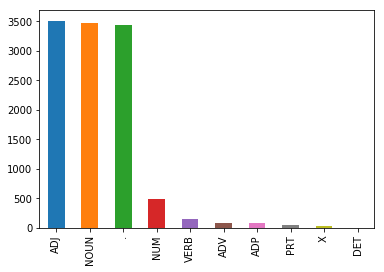

In [31]:
# Justification for has-hyphen parameter

l=[]
for sent in corpus:
    for i in sent:
        if '-' in i[0]:
            l.append(i[1])
            
df=pd.DataFrame({'col':l})
fig, ax = plt.subplots()
df['col'].value_counts().plot(ax=ax, kind='bar')

In [32]:
# A Skewed Distribution favouring ADJ, NOUN, . Tags

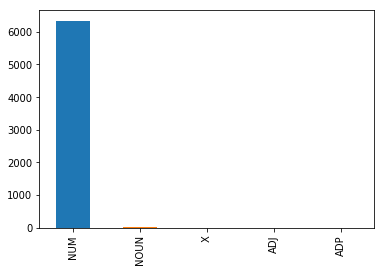

In [33]:
# Justification for is_numeric parameter

l=[]
for sent in corpus:
    for i in sent:
        if i[0].isdigit():
            l.append(i[1])
            
df=pd.DataFrame({'col':l})
fig, ax = plt.subplots()
df['col'].value_counts().plot(ax=ax, kind='bar')

In [34]:
# A Skewed Distribution favouring the NUM Tag

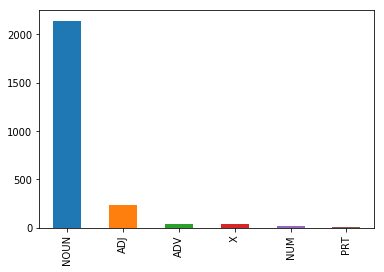

In [35]:
# Justification for capitals_inside parameter

l=[]
for sent in corpus:
    for i in sent:
        if i[0][1:].lower() != i[0][1:]:
            l.append(i[1])
            
df=pd.DataFrame({'col':l})
fig, ax = plt.subplots()
df['col'].value_counts().plot(ax=ax, kind='bar')

In [36]:
# A Skewed Distribution favouring the NOUN Tag

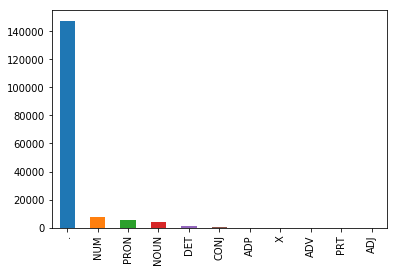

In [37]:
# Justification for is_capitalized / is_all_caps parameter

l=[]
for sent in corpus:
    for i in sent:
        if i[0].upper() == i[0]:
            l.append(i[1])
            
df=pd.DataFrame({'col':l})
fig, ax = plt.subplots()
df['col'].value_counts().plot(ax=ax, kind='bar')

In [38]:
# A skewed distribution favouring the . Tag

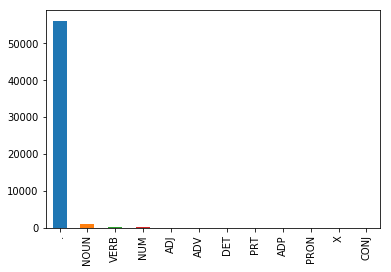

In [39]:
# Justification for is_last parameter

l=[]
for sent in corpus:
    l.append(sent[-1][1])
            
df=pd.DataFrame({'col':l})
fig, ax = plt.subplots()
df['col'].value_counts().plot(ax=ax, kind='bar')

In [40]:
# A skewed distribution favouring the . Tag

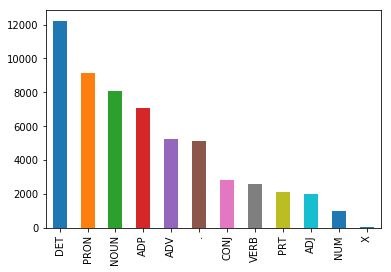

In [41]:
# Justification for is_first parameter

l=[]
for sent in corpus:
    l.append(sent[0][1])
            
df=pd.DataFrame({'col':l})
fig, ax = plt.subplots()
df['col'].value_counts().plot(ax=ax, kind='bar')

In [42]:
# This distribution isn't as skewed as the ones we saw above, but still the inclusion of this feature leads 
# to increase in accuracy slightly, this might be because this feature in tandem with other features is a
# better discriminator rather than the features separately

In [43]:
# Justification for the inclusion of Previous and Next Word :
# Most obvious choices for features are: the word itself, the word before and the word after.

In [44]:
# Justification for the inclusion of Previous and Next Tag:
# This choice of features was inspired from the HMM Model where the Hidden States are the Tags
# And the transitions occur between the Tags (i.e. the Hidden States)

In [45]:
# Justification for the inclusion of Prefix and Suffix Features

In [46]:
# the 2-letter suffix is a great indicator of past-tense verbs, ending in “-ed”.
# the 3-letter suffix helps recognize the present participle ending in “-ing”.
# Such Similar Patterns exist in prefix too

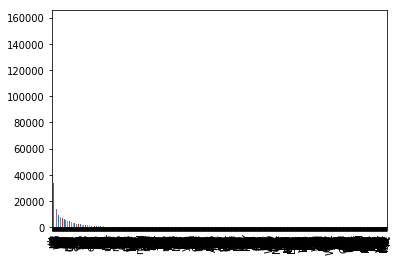

In [47]:
# Justification for suffix parameter

l=[]
for sent in corpus:
    for i in sent:
        l.append(i[0][-3:-1])
        
df=pd.DataFrame({'col':l})
fig, ax = plt.subplots()
df['col'].value_counts().plot(ax=ax, kind='bar')


In [48]:
# The Range of the Frequency Values shows how skewed the suffix distribution is

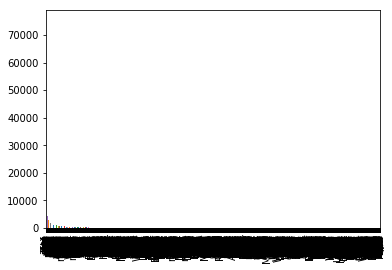

In [49]:
# Justification for prefix parameter

l=[]
for sent in corpus:
    for i in sent:
        l.append(i[0][0:3])

df=pd.DataFrame({'col':l})
fig, ax = plt.subplots()
df['col'].value_counts().plot(ax=ax, kind='bar')


In [50]:
# The Range of the Frequency Values shows how skewed the prefix distribution is